In [69]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import operator
import sys, os
import time
import cv2

In [27]:
json_file = open('model-bw.json','r')
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)

In [28]:
#load weights into new model
loaded_model.load_weights('model-bw.h5')
print("Loded Model from Disk")

Loded Model from Disk


In [29]:
#category Discnory
categories = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 10:'K', 
              11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 19:'T', 20:'U', 
              21:'V', 22:'W', 23:'X', 24:'Y'}

Actual Gesture: 


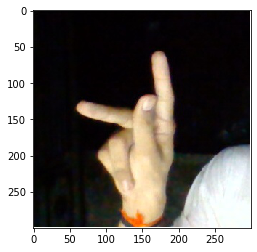

Predicted Gesture: K


In [73]:
#path = r'C:\Users\DC\Desktop\a.jpg' 
path = r'E:\SGP Projects\5th Sem\Extra\Dataset\training\K\v_20.jpg' 
print("Actual Gesture: ")
plt.imshow(image.load_img(path))
plt.show()
test_img = image.load_img(path, target_size=(28,28))
test_img = test_img.convert(mode='L')
test_img = image.img_to_array(test_img) 
test_img = np.expand_dims(test_img, axis=0) 
result = loaded_model.predict(test_img)
#print(result)
index = np.where(result == 1)
print("Predicted Gesture: "+categories[index[1][0]])

In [74]:
cap = cv2.VideoCapture(0)
while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)
    
    # Got this from collect-data.py
    # Coordinates of the ROI
    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0) ,1)
    # Extracting the ROI(Region of Interest)
    roi = frame[y1:y2, x1:x2]
    
    # Resizing the ROI so it can be fed to the model for prediction
    roi = cv2.resize(roi, (28, 28)) 
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, test_image = cv2.threshold(roi, 140, 255, cv2.THRESH_BINARY)
    new_img = cv2.resize(roi, (50,50))
    cv2.imshow("test", test_image)
    # Batch of 1
    result = loaded_model.predict(test_image.reshape(1, 28, 28, 1))
    prediction = {'A': result[0][0],'B': result[0][1],'C': result[0][2],'D': result[0][3],'E': result[0][4],'F': result[0][5],
                 'G': result[0][6],'H': result[0][7],'I': result[0][8],'J': result[0][9],'K': result[0][10],'L': result[0][11],
                  'M': result[0][12],'N': result[0][13],'O': result[0][14],'P': result[0][15],'Q': result[0][16],'R': result[0][17],
                  'S': result[0][18],'T': result[0][19],'U': result[0][20],'V': result[0][21],'W': result[0][22],'X': result[0][23],
                  'Y': result[0][24]
                 }
    # Sorting based on top prediction
    prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)
    
    # Displaying the predictions
    cv2.putText(frame, prediction[0][0], (10, 120), cv2.FONT_HERSHEY_PLAIN, 10, (0,255,255), 3)
    pr_img = image
    cv2.imshow("Frame", frame)
    time.sleep(0.2)
    interrupt = cv2.waitKey(10)
    if interrupt & 0xFF == 27: # esc key
        break
cap.release()
cv2.destroyAllWindows()